In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Identity metrics

In [21]:
identity_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/identity_ood_metrics_deg_HT29_TNFA.csv",
                              index_col=0)
identity_metrics.shape

(6, 33)

**Intermezzo: get total list of genes**

In [22]:
gene_list = identity_metrics.T.sort_values(by="r_squared")
gene_list["perturbation"] = gene_list.index.copy()
gene_list = gene_list.reset_index(drop=True)

In [23]:
n_splits = 5
gene_list["Perturbation effect"] = None

range_cond = np.arange(len(gene_list))
range_cond_split = np.array_split(range_cond,n_splits)
for i, idx_list in enumerate(range_cond_split):
    gene_list.loc[idx_list, "Perturbation effect"] = i
gene_list = gene_list.set_index("perturbation") 

## CellFlow

In [24]:
cellflow_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/cellflow_ood_metrics_deg_HT29_TNFA.csv",
                              index_col=0)
cellflow_metrics.shape

(6, 33)

## Mean

In [33]:
mean_metrics = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/ot_pert/out/results_metrics/metrics/sweep_cell_line_pathway/mean_train_metrics_deg_HT29_TNFA.csv",
                              index_col=0)
mean_metrics.shape

(6, 33)

In [34]:
mean_metrics.mean(1)

r_squared           -4.169101
sinkhorn_div_1      14.638524
sinkhorn_div_10      7.741247
sinkhorn_div_100     7.517542
e_distance          15.010339
mmd                  0.080585
dtype: float64

# Plot comparisons

In [35]:
merged = pd.concat([identity_metrics, mean_metrics, cellflow_metrics], axis=1).T

In [36]:
merged["Model"] = ["Identity"]*identity_metrics.shape[1] + ["Mean"]*mean_metrics.shape[1] + ["cellFlow"]*cellflow_metrics.shape[1]

In [37]:
perturbation_cat = []
for pert in merged.index:
    perturbation_cat.append(gene_list.loc[pert, "Perturbation effect"])


In [38]:
merged["Perturbation effect"] = perturbation_cat

In [39]:
merged.groupby("Model").mean()

,r_squared,sinkhorn_div_1,sinkhorn_div_10,sinkhorn_div_100,e_distance,mmd,Perturbation effect
Model,,,,,,,
Identity,-3.699822,8.817088,1.919810,1.696108,3.367481,0.025392,1.909091
Mean,-4.169101,14.638524,7.741247,7.517542,15.010339,0.080585,1.909091
cellFlow,-0.298999,6.152279,1.894434,1.642083,3.237424,0.088656,1.909091


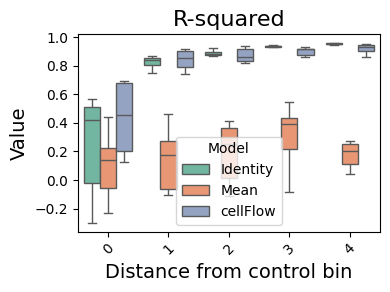

In [44]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="r_squared", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("R-squared", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

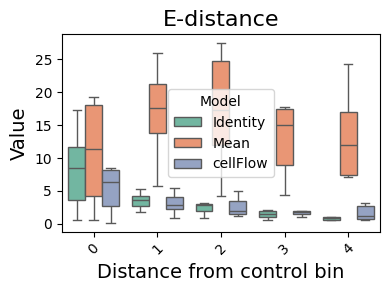

In [43]:
plt.figure(figsize=(4, 3))
sns.boxplot(x="Perturbation effect", hue="Model", y="e_distance", data=merged, palette="Set2", showfliers=False)

# Add labels and title
plt.title("E-distance", fontsize=16)
plt.xlabel("Distance from control bin", fontsize=14)
plt.ylabel("Value", fontsize=14)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [42]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_1", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 1", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [16]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_10", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 10", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [17]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="sinkhorn_div_100", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("Sinkhorn 100", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

In [23]:
# plt.figure(figsize=(3, 4))
# sns.boxplot(x="Perturbation effect", hue="Model", y="mmd", data=merged, palette="Set2", showfliers=False)

# # Add labels and title
# plt.title("MMD", fontsize=16)
# plt.xlabel("Condition", fontsize=14)
# plt.ylabel("Value", fontsize=14)

# # Show the plot
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()